# Macroscopic body Green's tensor

The presence of a macroscopic body in the space surrounding an atom shifts the energy levels of the atom and modifies the spontaneous emission of said atom. In order to understand the coupling of the atom to the macroscopic object we use the Green's tensor method. IN which, we decompose the EM field produced at a point in space $\vec{r}$ at time $t$ produced by a source at $\vec{r}'$ at time $t'=0$. This tensor can be decomposed as:

$\pmb{G}(\vec{r}, \vec{r}', \omega) = \pmb{G}_0(\vec{r}, \vec{r}', \omega) + \pmb{G}_{sc}(\vec{r}, \vec{r}', \omega)$

Where $\pmb{G}_0 $ is the Green's tensor of a homogeneous medium (vacuum) and $\pmb{G}_{sc}$ is the scattering due to the presence of the nanofiber.

$\pmb{G}_0 = \displaystyle \frac{-\delta(\vec{r} - \vec{r}')}{3k_2^2} \pmb{1} + \displaystyle \frac{e^{ik_2R}}{4\pi R}\left[ \left(1 + \displaystyle \frac{ik_2R}{k_2^2 R^2}\right)\pmb{1} + \displaystyle \frac{3 - 3ik_2R - k_2^2 R^2}{k_2^2 R^2} (\vec{r}\otimes \vec{r}')\right] $ 

$R = |\vec{r} - \vec{r}'|$, $\otimes$ : tensor product

$k_2^2 = \displaystyle \frac{\omega^2}{c^2}$ wave vector norm in the vacuum.

There is a divergence of the Green's tensor for $\vec{r} = \vec{r}'$ ($R=0$).


In [1]:
# import libraries 
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import cmath
from math import *

In [2]:
#from numpy import linalg as LA

def _G0(r_vect, r_s, w):
    
    """
    w = pulsation
    r_vect = position to calculate the field vector in cylindrical coordinates
    r_s = position vector of the source in cylindrica coordinates
    
    """
    k = w  #c = 1
    
    #cylindrical coordinates
    (r, phi, z) = r_vect
    (rs, phis, zs) = r_s
    
    #Cartesian coordinates
    x, y, z = [r*cos(phi), r*sin(phi), z]
    xs, ys, zs = [rs*cos(phis), rs*sin(phis), zs]
    
    Delta_R = r_vect - r_s #distance
    R = np.sqrt((x-xs)**2 + (y-ys)**2 + (z-zs)**2) #frobenius norm
    #print(R)
    
    RR = 1/R**2 * np.array([[(x-xs)**2, (x-xs)*(y-ys), (x-xs)*(z-zs)], 
                            [(y-ys)*(x-xs), (y-ys)**2, (y-ys)*(z-zs)], 
                            [(z-zs)*(x-xs), (y-ys)*(z-zs), (z-zs)**2]])
    
    
    if R == 0:
        
        print("Divergence") 
        G0 = k/(6*pi)*np.identity(3) #Self term
        
    else:
        
        print("No divergence")  
        G0 = cmath.exp(1j*k*R)/(4*pi*R)*((1 + (1j*k*R)/(k*R)**2) * np.identity(3) \
                                    + ((3-3*1j*k*R-(k*R)**2)/(k*R)**2) * RR)
    return G0

For $r > a$  and  $r' > a$, with $a$ the nanofiber's radius:

$\pmb{G}_{sc}(\vec{r}, \vec{r}', \omega) = \displaystyle \frac{i}{8\pi}\sum_{\nu = -\infty}^{\infty}\int_{-\infty}^{\infty} \displaystyle \frac{d\beta}{\eta_2^2} \left\{ \left[A_R \vec{M}_{\nu}(\beta, \vec{r}) + B_R \vec{N}_{\nu}(\beta, \vec{r}) \right]\vec{M}_{\nu}^{*}(\beta, \vec{r}') + \left[ C_R \vec{N}_{\nu}(\beta, \vec{r}) + D_R\vec{M}_{\nu}(\beta, \vec{r}) \right]\vec{N}_{\nu}^{*}(\beta, \vec{r}')\right\}$

where $\eta_2 = \sqrt{k_2^2-\beta^2}$

$\beta$ : projection of $\vec{k}$ over the nanofiber's axis.

$|\beta| = \displaystyle \frac{\omega}{c} cos(\theta_0)$

$\pmb{G}_{sc}(\vec{r}, \vec{r}', \omega) = \displaystyle \int_{-\infty}^{\infty} d \beta \sum_{\nu = -\infty}^{\infty} \bar{g}_{\nu}(\rho, \rho', \omega, \beta, a)e^{i(\nu \Delta \phi + \beta \Delta z)} = \displaystyle \int_{-\infty}^{\infty} d \beta \sum_{\nu = -\infty}^{\infty} f_{\nu}(\beta) $ 

with $\bar{g}_{\nu}(\rho, \rho', \omega, \beta, a) = \displaystyle \frac{i}{8\pi \ \eta_2^2} \left[ \left[A_R \vec{M}_{\nu}(\beta, \vec{r}) + B_R \vec{N}_{\nu}(\beta, \vec{r}) \right]\vec{M}_{\nu}^{*}(\beta, \vec{r}') + \left[ C_R \vec{N}_{\nu}(\beta, \vec{r}) + D_R\vec{M}_{\nu}(\beta, \vec{r}) \right]\vec{N}_{\nu}^{*}(\beta, \vec{r}')\right] e^{-i(\nu \Delta \phi + \beta \Delta z)} $


In [3]:
#%% Integrand

def IGA(nu, beta, k1, k2, r_vect, r_s, a=1):
    
    Eta1 = a*np.emath.sqrt(k1**2 - beta**2)
    Eta2 = a*np.emath.sqrt(k2**2 - beta**2) #complex for guided modes
    k1 = k1*a
    k2 = k2*a
    
    r_vect = r_vect/a
    r_obs = r_s/a
    
    [AR, BR, CR] = scalar_coeffs(nu, a*beta, Eta1, Eta2, k1, k2)
    
    [M1, N1, M_conj1, N_conj1] = Vector_field_coeffs(r_vect, r_s, nu, beta, Eta2)
    
    term1 = (AR*M1 + BR*N1)
    term2 = (CR*N1 + BR*M1)
    
    Int_GA = (1j/(8*pi*Eta2**2)) * (np.outer(term1, M_conj1)
                                  + np.outer(term2, N_conj1))
        
    return Int_GA

#print(IGA(0, 1.5, 2, 1, np.array([1, 0, 1]), np.array([1, 0, 1])))

## Vector coefficients

$\vec{M}_{\nu}, \vec{N}_{\nu}$ are vector wavefunctions and $A_R, C_R, B_R = D_R$ some scalar coefficients determined with EM field continuity relations on the surface of the fiber.


\begin{align}
\vec{M}_{\nu}(\beta, \vec{r}) & = \left[ \displaystyle \frac{i\nu}{r} H_{\nu}^{(1)}(\eta r)\vec{e_r} - \eta H_{\nu}^{'(1)}(\eta r) \vec{e_{\varphi}}\right] e^{i(\nu \varphi + \beta z)}\\
\vec{N}_{\nu}(\beta, \vec{r}) & =  \displaystyle \frac{1}{\sqrt{\eta^2 + \beta^2}} \left[ i \beta \eta H_{\nu}^{'(1)}(\eta r) \vec{e_r} - \displaystyle \frac{\nu\beta}{r} H_{\nu}^{(1)}(\eta r)\vec{e_{\varphi}} + \eta^2 H_{\nu}^{(1)}(\eta r)\vec{e_z} \right] e^{i(\nu \varphi + \beta z)} \\
\vec{M}_{\nu}^{*}(\beta, \vec{r}) & = \left[ \displaystyle -\frac{i\nu}{r} H_{\nu}^{(1)}(\eta r)\vec{e_r} - \eta H_{\nu}^{'(1)}(\eta r) \vec{e_{\varphi}}\right] e^{-i(\nu \varphi + \beta z)} \\
\vec{N}_{\nu}^{*}(\beta, \vec{r}) & =  \displaystyle \frac{1}{\sqrt{\eta^2 + \beta^2}} \left[ -i \beta \eta H_{\nu}^{'(1)}(\eta r) \vec{e_r} - \displaystyle \frac{\nu\beta}{r} H_{\nu}^{(1)}(\eta r)\vec{e_{\varphi}} \eta^2 H_{\nu}^{(1)}(\eta r)\vec{e_z}\right] e^{-i(\nu \varphi + \beta z)} \\
\end{align}

To make the coefficients dimentionless $\bar{r} = r/a$, $\bar{\eta} = a \eta$, $\bar{\beta} = a \beta$

\begin{align}
\vec{M}_{\nu}(\beta, \vec{r}) & = a\left[ \displaystyle \frac{i\nu}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta} \bar{r})\vec{e_r} - \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta} \bar{r}) \vec{e_{\varphi}}\right] e^{i(\nu \varphi + \beta z)}\\
\vec{N}_{\nu}(\beta, \vec{r}) & = \displaystyle \frac{1}{a\sqrt{\bar{\eta}^2 + \bar{\beta}^2}} \left[ i \bar{\beta} \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta}\bar{r}) \vec{e_r} - \displaystyle \frac{\nu\bar{\beta}}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_{\varphi}} + \bar{\eta}^2 H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_z} \right] e^{i(\nu \varphi + \beta z)} \\
\vec{M}_{\nu}^{*}(\beta, \vec{r}) & = a \left[ \displaystyle -\frac{i\nu}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta} \bar{r})\vec{e_r} - \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta} \bar{r}) \vec{e_{\varphi}}\right] e^{-i(\nu \varphi + \beta z)} \\
\vec{N}_{\nu}^{*}(\beta, \vec{r}) & = \displaystyle \frac{1}{a\sqrt{\bar{\eta}^2 + \bar{\beta}^2}} \left[ -i \bar{\beta} \bar{\eta} H_{\nu}^{'(1)}(\bar{\eta}\bar{r}) \vec{e_r} - \displaystyle \frac{\nu\bar{\beta}}{\bar{r}} H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_{\varphi}} + \bar{\eta}^2 H_{\nu}^{(1)}(\bar{\eta}\bar{r})\vec{e_z} \right] e^{-i(\nu \varphi + \beta z)} \\
\end{align}


In [4]:
def Vector_field_coeffs(r_vect, r_s, nu, beta, eta, a=1): # -> 4 vectors of size (3, 1)
    
    """
    nu = mode
    beta = integration point in the real line (physically: propagation direction)
    r_vect = position to calculate the field vector in cartesian coordinates
    r_s = position vector of the source in cartesian coordinates
    
    """
    # Observation vector cartesian
    (x, y, z) = r_vect
    
    r = np.sqrt(x**2 + y**2) #distance from axis
    phi = asin(y/r) #angle
    
    #r, phi, z = r_vect #cylindrical
    
    er = np.array([cos(phi), sin(phi), 0]) #radial unity vector
    ephi = np.array([-sin(phi), cos(phi), 0]) #angular unity vector
    ez = np.array([0, 0, 1]) #axis unity vector
    
    Hn = scipy.special.hankel1(nu, eta*r)
    Hn_prime = scipy.special.h1vp(nu, eta*r)
    
    #Source vector
    (xs, ys, zs) = r_s
    
    rs = np.sqrt(xs**2 + ys**2) #distance from axis 
    phi_s = asin(ys/rs) #angle
    
    #rs, phi_s, zs = r_s
    
    er_s = np.array([cos(phi_s), sin(phi_s), 0]) #radial unity vector
    ephi_s = np.array([-sin(phi_s), cos(phi_s), 0]) #angular unity vector
    ez_s = np.array([0, 0, 1]) #axis unity vector
    
    Hn_s = scipy.special.hankel1(nu, eta*rs)
    Hn_prime_s = scipy.special.h1vp(nu, eta*rs)
    
    M = a*((1j*nu/r)*Hn*er - eta*Hn_prime*ephi) * cmath.exp(1j*(nu*phi + beta*z))
    
    N = (1/a)*(1/cmath.sqrt(eta**2 + beta**2)) * (1j*eta*beta*Hn_prime*er - (nu*beta/r)*Hn*ephi + eta**2*Hn*ez) * cmath.exp(1j*(nu*phi + beta*z))
    
    M_conj = a*((-1j*nu/rs)*Hn_s*er_s - eta*Hn_prime_s*ephi_s) * cmath.exp(-1j*(nu*phi_s + beta*zs))
    
    N_conj = (1/a)*(1/cmath.sqrt(eta**2 + beta**2)) * (-1j*eta*beta*Hn_prime_s*er_s - (nu*beta/rs)*Hn_s*ephi_s + eta**2*Hn_s*ez_s) * cmath.exp(-1j*(nu*phi_s + beta*zs))
    
    return [M, N, M_conj, N_conj]

## Scalar coefficients

\begin{align}
A_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)} \left[ \displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{J_{\nu}^{'}(\eta_2 a)}{\eta_2 J_{\nu}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right)\right] \\
C_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)}  \left[\displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 J_{\nu}^{'}(\eta_2 a)}{\eta_2 J_{\nu}(\eta_2 a)}  \right) \right]\\
B_R = D_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)} \displaystyle \frac{\nu \beta}{a} \frac{k_2}{\eta_2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right) \left( \frac{J_{\nu}^{'}(\eta_2 a)}{J_{\nu}(\eta_2 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{H_{\nu}^{(1)}(\eta_2 a)}  \right) \\
\end{align}

To make these coefficients dimentionless : $\bar{r} = r/a$, $\bar{\eta} = a \eta$, $\bar{\beta} = a \beta$ ans $\bar{k} = a k $

\begin{align}
A_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta_2})}{H_{\nu}^{(1)}(\bar{\eta_2})} \left[ (\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} -  \frac{1}{\bar{\eta}_1^2} \right)^2 - \left( \frac{J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{J_{\nu}^{'}(\bar{\eta_2})}{\bar{\eta}_2 J_{\nu}(\bar{\eta_2})}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{\bar{k}_2^2 H_{\nu}^{'(1)}(\bar{\eta_2})}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta_2})}  \right)\right] \\
C_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta}_2)}{H_{\nu}^{(1)}(\bar{\eta}_2)}  \left[(\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} -  \frac{1}{\bar{\eta}_1^2} \right)^2   - \left( \frac{J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{H_{\nu}^{'(1)}(\bar{\eta_2})}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta_2})}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta_1})}{\bar{\eta}_1 J_{\nu}(\bar{\eta_1})} - \frac{\bar{k}_2^2 J_{\nu}^{'}(\bar{\eta_2})}{\bar{\eta}_2 J_{\nu}(\bar{\eta_2})}  \right) \right]\\
B_R = D_R &= \displaystyle \frac{1}{W_R} \displaystyle \frac{J_{\nu}(\bar{\eta}_2)}{H_{\nu}^{(1)}(\bar{\eta}_2)}\nu \bar{\beta} \frac{\bar{k}_2}{\bar{\eta}_2} \left( \frac{1}{\bar{\eta}_2^2} - \frac{1}{\bar{\eta}_1^2} \right) \left( \frac{J_{\nu}^{'}(\bar{\eta_2})}{J_{\nu}(\bar{\eta_2})} - \frac{H_{\nu}^{'(1)}(\bar{\eta_2})}{H_{\nu}^{(1)}(\bar{\eta_2})}  \right) \\
\end{align}

In [5]:
def scalar_coeffs(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm, a=1):
    
    """
    nu = mode
    beta = integration point (dimentionless)
    eta i_norm: eta_i*a 
    k i_norm: k_i*a  
    
    """
    
    #Bessel fucntions
    J1 = scipy.special.jv(nu, eta1_norm)
    J2 = scipy.special.jv(nu, eta2_norm)
    
    #H2 = Hankel_n(nu, eta2*a)
    H2 = scipy.special.hankel1(nu, eta2_norm) #complex
    
    #Derivatives of the bessel functions
    JD1 = scipy.special.jvp(nu, eta1_norm)
    JD2 = scipy.special.jvp(nu, eta2_norm)
    
    #HD2 = Hankel_n_prime(nu, eta2*a)
    HD2 = scipy.special.h1vp(nu, eta2_norm) #complex
    
    W = WR(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm)
    
    A = (1/W)*(J2/H2) * ((nu*beta*a)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
          - (JD1/(eta1_norm*J1) - JD2/(eta2_norm*J2)) * ((k1_norm**2*JD1)/(eta1_norm*J1) - (k2_norm**2*HD2)/(eta2_norm*H2)))
    
    B = (1/W)*(J2/H2) * (k2_norm*nu*beta*a/(eta2_norm))*(1/(eta2_norm**2) - 1/(eta1_norm**2))*(JD2/J2 - HD2/H2)

    C = (1/W)*(J2/H2) * ((nu*beta*a)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
        - (JD1/(eta1_norm*J1) - HD2/(eta2_norm*H2))*((k1_norm**2*JD1)/(eta1_norm*J1) - (k2_norm**2*JD2)/(eta2_norm*J2)))
        
    return [A, B, C] #D=B

$W_R = \displaystyle \frac{\nu^2 \beta^2}{a^2} \left( \frac{1}{\eta_2^2} - \frac{1}{\eta_1^2} \right)^2 + \left( \frac{J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right) \left( \frac{k_1^2 J_{\nu}^{'}(\eta_1 a)}{\eta_1 J_{\nu}(\eta_1 a)} - \frac{k_2^2 H_{\nu}^{'(1)}(\eta_2 a)}{\eta_2 H_{\nu}^{(1)}(\eta_2 a)}  \right)$

If we make it dimentionless:

$W_R = \displaystyle (\nu \bar{\beta})^2 \left( \frac{1}{\bar{\eta}_2^2} - \frac{1}{\bar{\eta}_1^2} \right)^2 + \left( \frac{J_{\nu}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{\nu}(\bar{\eta}_1)} - \frac{H_{\nu}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{\nu}^{(1)}(\bar{\eta}_2)}  \right) \left( \frac{\bar{k}_1^2 J_{\nu}^{'}(\bar{\eta}_1)}{\bar{\eta}_1 J_{\nu}(\bar{\eta}_1)} - \frac{\bar{k}_2^2 H_{\nu}^{'(1)}(\bar{\eta}_2)}{\bar{\eta}_2 H_{\nu}^{(1)} (\bar{\eta}_2)}  \right)$

In [6]:
def WR(nu, beta, eta1_norm, eta2_norm, k1_norm, k2_norm, a=1): 
    
    """
    nu = mode
    beta = integration point (dimentionless)
    eta i_norm: eta_i*a 
    k i_norm: k_i*a  
    
    """
    
    #Bessel fucntions
    J1 = scipy.special.jv(nu, eta1_norm)
    H2 = scipy.special.hankel1(nu, eta2_norm)
    
    #Derivatives of the bessel functions
    JD1 = scipy.special.jvp(nu, eta1_norm)
    HD2 = scipy.special.h1vp(nu, eta2_norm)

    W = -(nu*beta)**2 * (1/(eta2_norm**2) - 1/(eta1_norm**2))**2 \
       + (JD1/(eta1_norm*J1) - HD2/(eta2_norm*H2))*(k1_norm**2*JD1/(eta1_norm*J1) - k2_norm**2*HD2/(eta2_norm*H2))

    return W

$W_R = 0 $ is the caracteristic equation of the optical fiber for the guided modes. It is invariant under the exchange  $\nu \rightarrow -\nu$.

## Poles


*  For $|\beta| < \left| \displaystyle \frac{\omega}{c} \right| < \left|\displaystyle \frac{n_f \ \omega}{c}\right| $ :  fields are decomposed on radiative modes.

    *  There is a pole for $ |\beta| = \left| \displaystyle \frac{\omega}{c} \right| $

*  For $ \left| \displaystyle \frac{\omega}{c}\right| < |\beta| < \left|\displaystyle \frac{n_f \ \omega}{c}\right| $ :  fields are decomposed on guided modes.

    *  There is a pole for $ |\beta| = \left| \displaystyle \frac{n_f \ \omega}{c} \right| $

    *  There is some poles $\beta_g$ for $\pmb{G}_{sc}$ that correspond to the guded modes ($W_R = 0$).

*  For $ \left| \displaystyle \frac{\omega}{c} \right| < \left|\displaystyle \frac{n_f \ \omega}{c}\right| < |\beta| $ : fields do not propagate!

In [7]:
n_f = 1.45 #index of refraction nanofiber
n_env = 1 #index of refraction environnement
# eps_f = n_f**2
# eps_env = 1

rA = np.array([2, 0, 0]) #coordinate of the evaluation point (nm)
rB = np.array([2, 0, 10]) #coordinate of the source point (nm)

#We are going to find the poles with k0 and nu
k0 = 5  
nu_value = 0 #terme dans la somme (mode)

step = 1e-2
Line_beta = np.arange(k0+step, n_f*k0-step, step)
#Line_beta = np.arange(-10, 10, step)

k2 = k0*np.ones(np.shape(Line_beta)) #w/c
k1 = n_f*k0*np.ones(np.shape(Line_beta)) #nf*w/c

Line_Eta1 = np.emath.sqrt(np.power(k1, 2) - np.power(Line_beta, 2))
Line_Eta2 = np.emath.sqrt(np.power(k2, 2) - np.power(Line_beta, 2))

Number of poles for mode nu = 0:  2


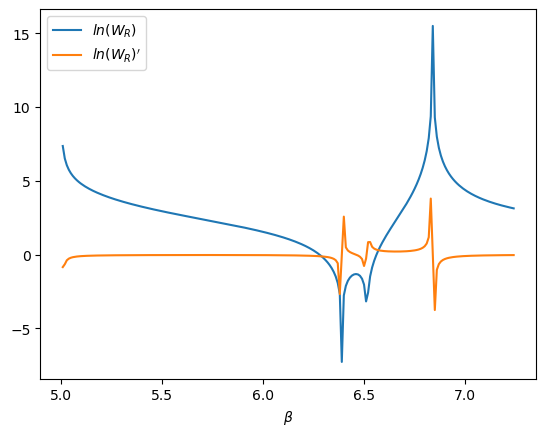

In [8]:
result = abs(WR(nu_value, Line_beta, Line_Eta1, Line_Eta2, k1, k2))
#Poles when WR = 0, however to refine the pole search we can use log(WR)
#log(WR -> 0) -> -oo se we just have to grab the values for beta that make log(WR) < 0

result_l = np.log(result) 
result_dl = np.gradient(result_l)

#figure
plt.figure()
plt.plot(Line_beta, result_l, label=r"$ln(W_R)$")
plt.plot(Line_beta, result_dl, label=r"$ln(W_R)'$")
plt.legend(loc="upper left")
plt.xlabel(r'$\beta$')

beta_pole = []
pole_index = []

for index in range(len(result_dl)-1): 
        if result_l[index] < 0 and (result_dl[index] < 0 and result_dl[index+1] > 0):
            
            # print("beta:", Line_beta[index])
            
            beta_pole.append(Line_beta[index])
            pole_index.append(index)
            
            #beta_pole.append([nu, Line_beta[index], index])
        
number_of_poles = len(beta_pole)

print("Number of poles for mode nu = {}: ".format(nu_value), number_of_poles)

## Contour integral
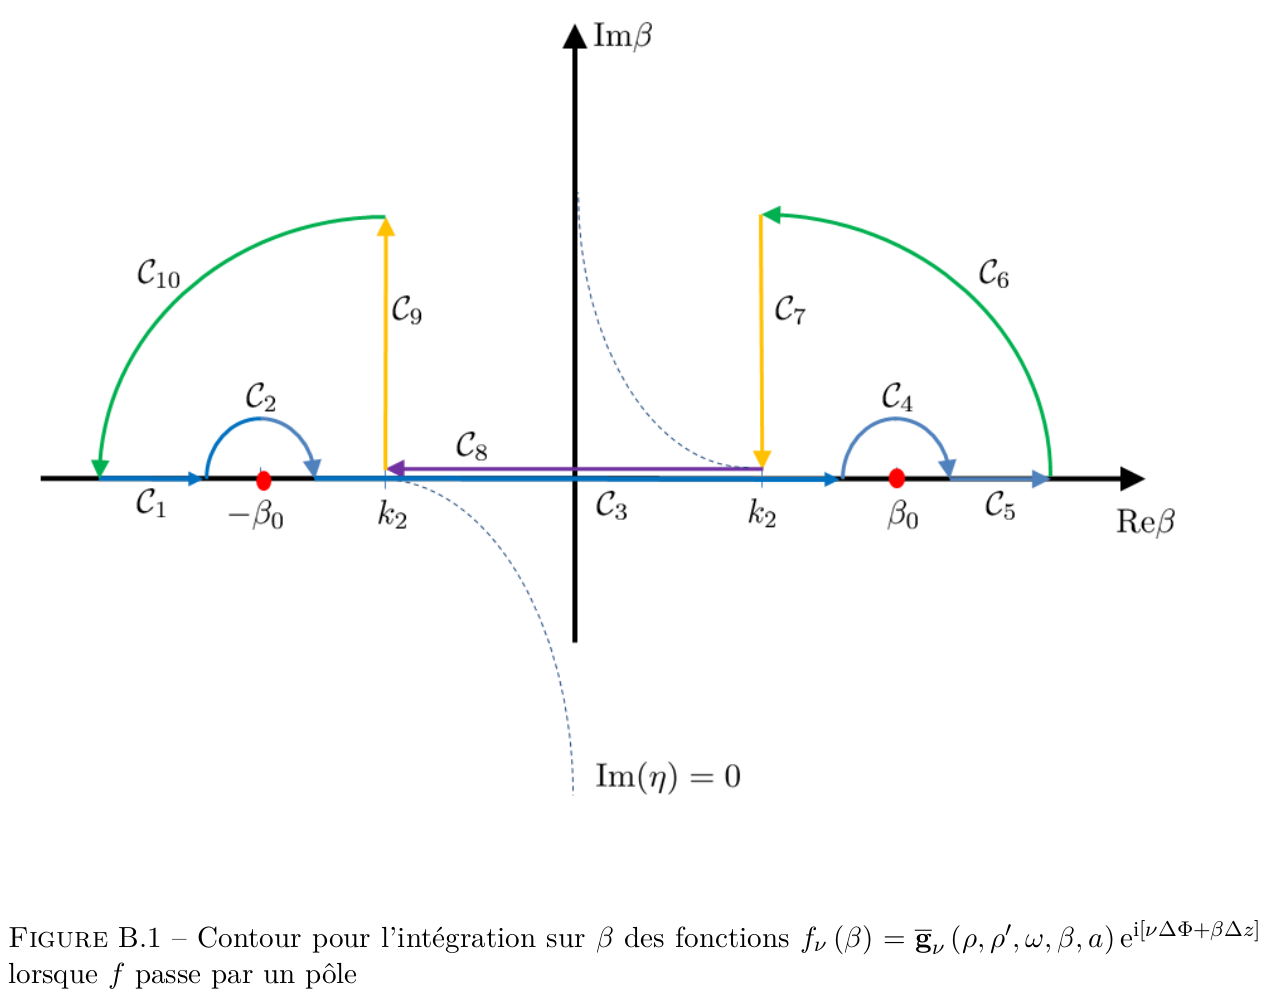

## Plot branches

$\beta$ the integral contour can be on top of the branches but it shouldn't surround them.

## Plot contours

$R_p > 0$ and $R_p = c 0$, chosen so that $R_c >> (\beta_0 - k2) >> R_p$.

* C1: $\beta = x, x \in [-(k_2+R_c), -(\beta_0 + R_p)]$
* C2: $\beta = -(\beta_0 + R_p e^{-i \theta}), \theta \in [\pi, 0]$
* C3: $\beta = x, x \in [-\beta_0 + R_p,  \beta_0 - R_p]$
* C4: $\beta = (\beta_0 + R_p e^{i \theta}), \theta \in [\pi, 0]$
* C5: $\beta = x, x \in [\beta_0 + R_p, k_2 + R_c]$
* C6: $\beta = (k_2 + R_c e^{i \theta}), \theta \in [0, \pi/2]$
* C7: $\beta = k2 + i\epsilon, \epsilon \in [R_c, 0]$
* C8: $\beta = -x + i\delta, \delta << 1, x \in[-k_2, k_2] $
* C9: $\beta = -k_2 + i\epsilon, \epsilon \in [0, R_c]$
* C10: $\beta = -k_2 - R_c e^{i\theta}, \theta \in [\pi/2, \pi]$

**Note:** $\beta_0 = n \frac{\omega}{c}$ and $k_2 = \displaystyle \frac{\omega}{c}$ and

In [9]:
print(n_f * k0 - k0)
print(step)

2.25
0.01


In [11]:
Rc = 10 # Rc >> 2.25
Rp = 0.01
delta = 1e-3

#Contours
theta2 = np.arange(0, np.pi, 0.01)
theta4 = np.arange(0, np.pi, 0.01)
theta6 = np.arange(0, np.pi/2, 0.01)
theta10 = np.arange(np.pi/2, np.pi, 0.01)

step = 1e-3
C1 = np.arange(-(k0 + Rc), -(n_f*k0 + Rp), step) + 0j
C2 = np.array([-n_f*k0 - Rp*cmath.exp(-1j*th) for th in theta2])
C3 = np.arange(-n_f*k0 + Rp, n_f*k0 - Rp, step)  + 0j
C4 = np.array([(n_f*k0 - Rp*cmath.exp(-1j*th)) for th in theta4])
C5 = np.arange(n_f*k0 + Rp, k0 + Rc, step)  + 0j
C6 = np.array([(k0 + Rc*cmath.exp(1j*th)) for th in theta6])
#C7 = 1j*np.arange(Rc, delta-step, -step) + k0
C7 = 1j*np.arange(delta, Rc+step, step) + k0
C8 = np.arange(k0, -k0, -step) +1j*delta
C9 = 1j*np.arange(delta, Rc+step, step) - k0
C10 = np.array([- k0 + Rc*cmath.exp(1j*th) for th in theta10])

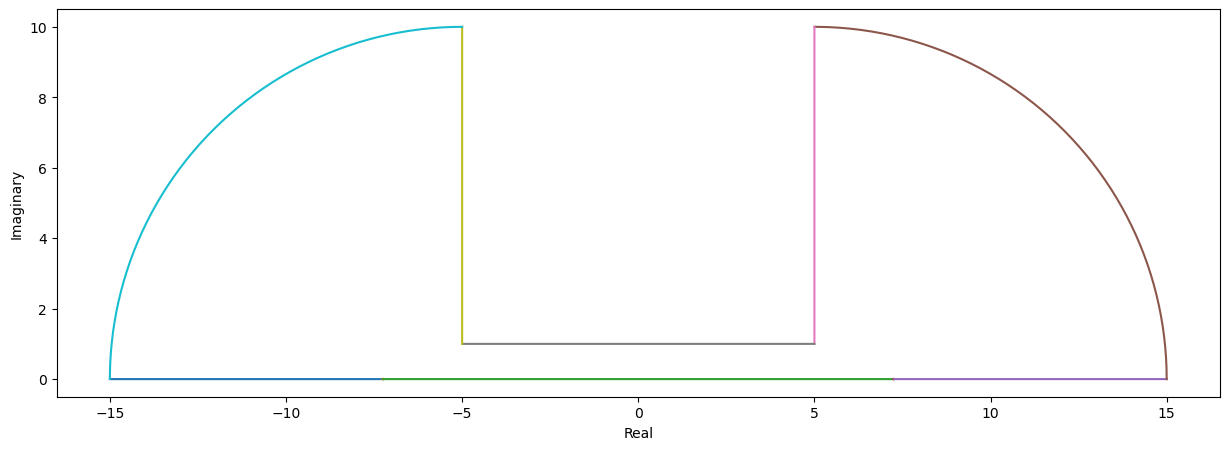

In [12]:
# extract real part using numpy array 
x1 = C1.real 
x2 = C2.real
x3 = C3.real
x4 = C4.real
x5 = C5.real
x6 = C6.real
x7 = C7.real
x8 = C8.real
x9 = C9.real
x10 = C10.real

# extract imaginary part using numpy array 
y1 = C1.imag 
y2 = C2.imag 
y3 = C3.imag 
y4 = C4.imag 
y5 = C5.imag
y6 = C6.imag
y7 = C7.imag
y8 = C8.imag
y9 = C9.imag
y10 = C10.imag 

# plot the complex numbers
fig = plt.figure(figsize = (15, 20))

plt.plot(x1, y1) 
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)
plt.plot(x10, y10)

plt.ylabel('Imaginary') 
plt.xlabel('Real')
plt.gca().set_aspect('equal')
plt.show() 

## Integration

Big quarter circles are neglected!

Making $R_p$ smaller makes the values inside smaller. 

### Vertical lines at $ \pm k0 $

$I = \displaystyle \int_{k2 + iRc}^{k2} d\beta \ f(\beta) = i \displaystyle \int_{Rc}^{0} d\epsilon \ f(\epsilon)$

$I \approx \displaystyle \frac{i h}{2} \sum_{k = 0}^{N-1} f(\epsilon_i) + f(\epsilon_{i+1})$; with $h = \epsilon_{i+1} -\epsilon_i$

In [13]:
I7 = 0
for i in range(len(C7)-1):
    
    I7 += (step/2) * 1j*(IGA(nu_value, C7[i], n_f*k0, k0, rA, rB) + IGA(nu_value, C7[i+1], n_f*k0, k0, rA, rB))

print(I7)

[[-3.02627821e+47-4.18112687e+47j  0.00000000e+00+0.00000000e+00j
  -4.64942995e+47+3.00839630e+47j]
 [ 0.00000000e+00+0.00000000e+00j -3.15701299e+46+1.00224082e+47j
   0.00000000e+00+0.00000000e+00j]
 [ 4.64942995e+47-3.00839630e+47j  0.00000000e+00+0.00000000e+00j
  -2.96299846e+47-5.15020573e+47j]]


Still divergent :/

In [14]:
I9 = 0
for i in range(len(C9)-1):
    
    I9 += (step/2) * 1j*(IGA(nu_value, C9[i], n_f*k0, k0, rA, rB) + IGA(nu_value, C9[i+1], n_f*k0, k0, rA, rB))

print(I9)

[[-2.57105667e+35-4.67675837e+34j  0.00000000e+00+0.00000000e+00j
  -2.42827043e+34+2.74599769e+35j]
 [ 0.00000000e+00+0.00000000e+00j  4.81413950e+32+7.30129545e+33j
   0.00000000e+00+0.00000000e+00j]
 [ 2.42827043e+34-2.74599769e+35j  0.00000000e+00+0.00000000e+00j
  -2.90803059e+35+1.02743335e+33j]]


In [15]:
print(I9 + I7)

[[-3.02627821e+47-4.18112687e+47j  0.00000000e+00+0.00000000e+00j
  -4.64942995e+47+3.00839630e+47j]
 [ 0.00000000e+00+0.00000000e+00j -3.15701299e+46+1.00224082e+47j
   0.00000000e+00+0.00000000e+00j]
 [ 4.64942995e+47-3.00839630e+47j  0.00000000e+00+0.00000000e+00j
  -2.96299846e+47-5.15020573e+47j]]


**Problem:** the values inside I seem to big! The sum doesn't cancel them out.

making $R_c$ smaller improves the values inside I9, but not those of I7. Increasing $R_c$ makes everything larger...code wrong?

### Horizontal line on top of the axis.

In [16]:
I8 = 0
for i in range(len(C8)-1):
    
    I8 += (step/2) * (IGA(nu_value, C8[i], n_f*k0, k0, rA, rB) + (IGA(nu_value, C8[i+1], n_f*k0, k0, rA, rB)))

print(I8)

[[12051.15188208 -6865.53641719j     0.            +0.j
    654.06915409 -8820.91846359j]
 [    0.            +0.j          8683.23788072-11273.85130035j
      0.            +0.j        ]
 [ -654.06915409 +8820.91846359j     0.            +0.j
   4441.20123089 +3480.9325002j ]]


### Horizontal lines $ |\beta| > \left| \displaystyle \frac{n_f \ \omega}{c} \right| $

In [17]:
I1 = 0
for i in range(len(C1)-1):
    
    I1 += (step/2) * ((IGA(nu_value, C1[i], n_f*k0, k0, rA, rB))+(IGA(nu_value, C1[i+1], n_f*k0, k0, rA, rB)))

print(I1)

[[ 1.99588576e-10-4.97600093e-09j  0.00000000e+00+0.00000000e+00j
  -3.46126541e-09-1.79333030e-10j]
 [ 0.00000000e+00+0.00000000e+00j -6.04699623e-11-1.50358529e-09j
   0.00000000e+00+0.00000000e+00j]
 [ 3.46126541e-09+1.79333030e-10j  0.00000000e+00+0.00000000e+00j
   1.53166829e-10-2.40703341e-09j]]


In [18]:
I5 = 0
for i in range(len(C5)-1):
    
    I5 += (step/2) * ((IGA(nu_value, C5[i], n_f*k0, k0, rA, rB))+(IGA(nu_value, C5[i+1], n_f*k0, k0, rA, rB)))

print(I5)

[[ 1.49793995e-10+4.99408492e-09j  0.00000000e+00+0.00000000e+00j
  -3.47379578e-09+1.44830449e-10j]
 [ 0.00000000e+00+0.00000000e+00j -7.60469329e-11+1.50924236e-09j
   0.00000000e+00+0.00000000e+00j]
 [ 3.47379578e-09-1.44830449e-10j  0.00000000e+00+0.00000000e+00j
   1.29260049e-10+2.41571570e-09j]]


Increasing $R_c$ doesn't change the values of the matrix much.

In [19]:
print(I8 + I9 + I1 + I5)

[[-2.57105667e+35-4.67675837e+34j  0.00000000e+00+0.00000000e+00j
  -2.42827043e+34+2.74599769e+35j]
 [ 0.00000000e+00+0.00000000e+00j  4.81413950e+32+7.30129545e+33j
   0.00000000e+00+0.00000000e+00j]
 [ 2.42827043e+34-2.74599769e+35j  0.00000000e+00+0.00000000e+00j
  -2.90803059e+35+1.02743335e+33j]]


## Residue calculation for the pole contributions.

$Res(f, \beta_{\lambda}) = \displaystyle \frac{1}{2 i \pi} \oint_{\partial B_R} f(\beta) d\beta = a_{-1}$

if pole of order 1: $a_{-1} = \displaystyle \lim_{\beta \rightarrow \beta_{\lambda}} \left( (\beta - \beta_{\lambda}) \cdot \ f(\beta) \right)$
